
# Project: TMDB movies Data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project I will be analyzing the TMDB movies dataset, I'll be interested in finding the relation between the budget and the popularity, trends for the movies that popular among people, and top movies over the years.
> The data set contain data like popularity, rating, budget, titles, dates, and revenue.
>
>**ill try to answer the below question**
>
>1: Does the budget affect the popularity of the movies?
>
>2: How popularity change over the last 15 years?
>
>3: How budget change over the last 15 years?
>
>4: Which is the top popular movie over the years?

In [24]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
# Loading the data set
df = pd.read_csv('tmdb-movies.csv')

In [3]:
# data shape to check columns/rows number
df.shape

(10866, 21)

In [4]:
# printing 3 rows from the data set to check how the data look likes.
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [5]:
# checking the data summary
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# get the number of duplicated
sum(df.duplicated())

1

In [41]:
# data info to check the data types and identify what we need to fix
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            10865 non-null  int64         
 1   popularity    10865 non-null  float64       
 2   budget        10865 non-null  float64       
 3   revenue       10865 non-null  float64       
 4   title         10865 non-null  object        
 5   runtime       10865 non-null  int32         
 6   release_date  10865 non-null  datetime64[ns]
 7   vote_count    10865 non-null  int64         
 8   vote_average  10865 non-null  float64       
 9   release_year  10865 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(3), object(1)
memory usage: 891.3+ KB


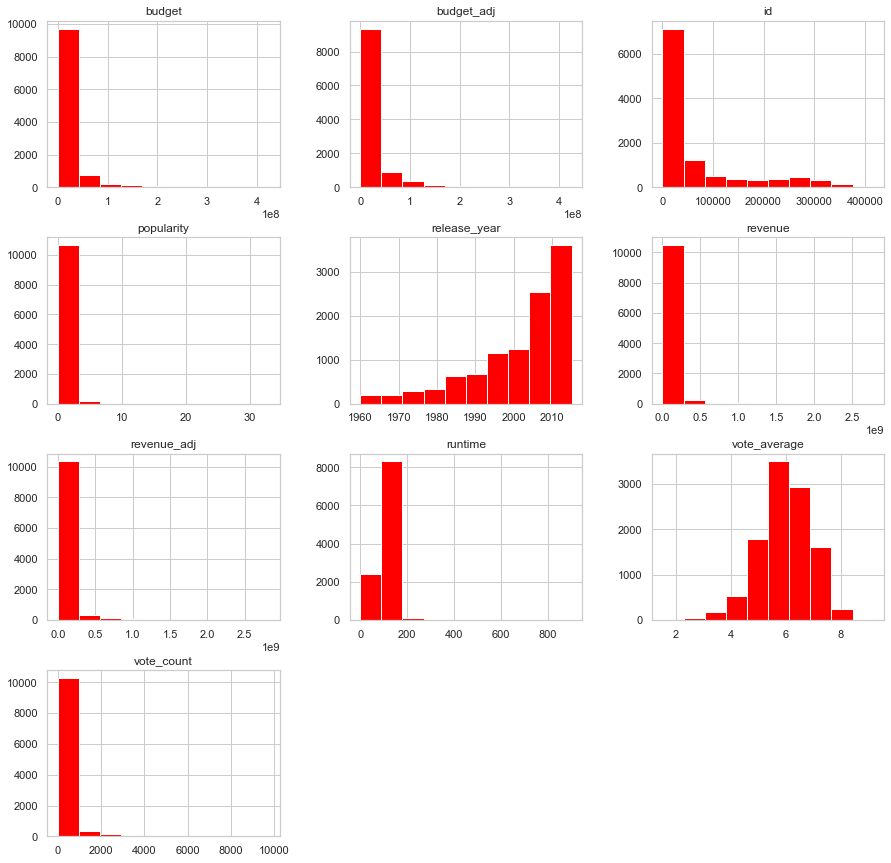

In [8]:
# plotting the columns distributions
df.hist(figsize=(15,15), color='red');

**from the info above we can see that:**
> 1-The data set contain 10866 rows, 21 columns.
>
> 2-Need to convert some columns type.
> 
> 3-Some columns are not needed in my analysis.
>
> 4- Missing and 0 values.
>
> 5- Duplicated data.

In [43]:
# function to calculates the avarage of any column

def get_avg(column_name):
    
    return df[column_name].mean()

In [55]:
# show budget mean 
get_avg('budget')

22291100.001052786

In [56]:
# show popularity mean 
get_avg('popularity')

0.6464455549010583

In [54]:
# show revenue mean 
get_avg('revenue')

61879229.882501915

In [9]:
# dropping the columns that I am not going to use in this project.

df.drop(['imdb_id','cast','director','homepage', 'tagline','keywords'
        ,'overview','genres','production_companies','budget_adj'
        ,'revenue_adj'], axis= 1, inplace=True)

In [10]:
# to confirm the shape.
df.shape

(10866, 10)

In [11]:
# need to change the release date from string to datetime type.
df['release_date'] = pd.to_datetime(df['release_date'])

In [12]:
# rename colmun 'original_title' to 'title'.
df = df.rename(columns={'original_title': 'title'})

In [13]:
#removing the duplicate.
df.drop_duplicates(inplace = True)

In [14]:
# confirm duplicate.
sum(df.duplicated())

0

In [15]:
# checking null values.
df.isnull().sum().sum()

0

In [16]:
#filling zero values with mean.
df=df.mask(df==0).fillna(df.mean())

In [17]:
#confirm fillna.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,66066.374413,0.646446,2.229110e+07,6.187923e+07,102.363021,217.399632,5.975012,2001.321859
std,92134.091971,1.000231,2.801385e+07,1.110236e+08,30.904043,575.644627,0.935138,12.813260
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000
25%,10596.000000,0.207575,1.462429e+07,3.982690e+07,90.000000,17.000000,5.400000,1995.000000
50%,20662.000000,0.383831,1.462429e+07,3.982690e+07,99.000000,38.000000,6.000000,2006.000000
75%,75612.000000,0.713857,1.500000e+07,3.982690e+07,111.000000,146.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [18]:
# converting run time from float to intger.
df['runtime'] = df['runtime'].astype(int)

In [19]:
# to confirm changes.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            10865 non-null  int64         
 1   popularity    10865 non-null  float64       
 2   budget        10865 non-null  float64       
 3   revenue       10865 non-null  float64       
 4   title         10865 non-null  object        
 5   runtime       10865 non-null  int32         
 6   release_date  10865 non-null  datetime64[ns]
 7   vote_count    10865 non-null  int64         
 8   vote_average  10865 non-null  float64       
 9   release_year  10865 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(3), object(1)
memory usage: 891.3+ KB


In [20]:
# to check how the data look after the changes.
df.head(3)

,id,popularity,budget,revenue,title,runtime,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,119,2015-03-18,2480,6.3,2015


### Data Cleaning 
> 1-I removed columns that I am not going to use.
>
>2- fill convert data types for the release date to datatype and run time to an integer.
>
>3- removed duplicated.
>
>4- filled the 0 values with the mean in the budget and revenue columns 


<a id='eda'></a>
## Exploratory Data Analysis


###  Question 1: Does the budget affect the popularity of the movies?

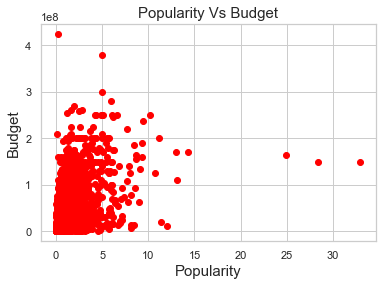

In [60]:
# plotting scatter plot with line to check if the budget affect the popularity.

x = df['popularity']
y = df['budget']

plt.scatter(x, y, c='red')
plt.title('Popularity Vs Budget', fontsize=(15))
plt.xlabel('Popularity', fontsize=(15))
plt.ylabel('Budget', fontsize=(15))
plt.figsize=(12,4)
plt.show();


In [28]:
# finding the correlation between popularity and budget.
df.corr().loc['popularity','budget'].round(2)

0.52


> **Plot 1: Popularity Vs Budget**
>
>*Does the budget affect the popularity of the movies?*
>
>As we can see from the scatter plot the budget and popularity have a **positive correlation (0.52)** which means that movies with a high budget can have good popularity.


### Question 2: How popularity change over the last 15 years?

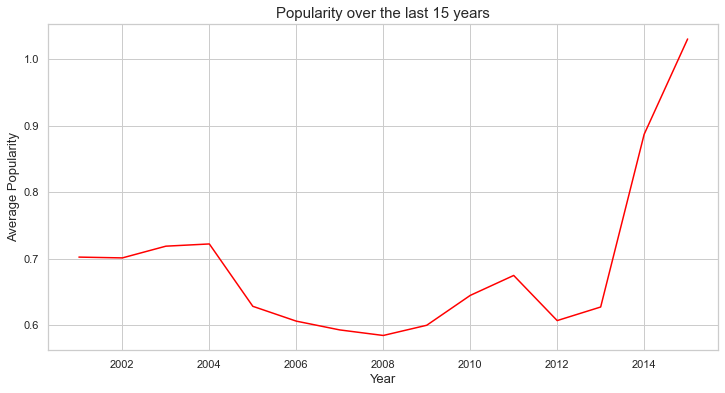

In [23]:
# Plotting chart showing the popularity change over the last 15 years.

df.groupby('release_year')['popularity'].mean().tail(15).plot(figsize=(12,6),c='red')
plt.title("Popularity over the last 15 years",fontsize = 15)
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13);


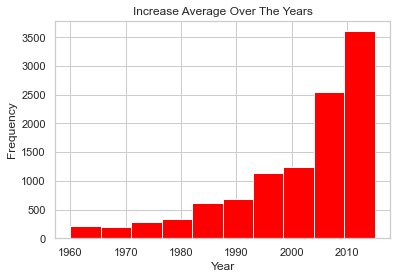

In [40]:
# histogr
df.release_year.hist(figsize=(6,4),color='red')
plt.title('Increase Average Over The Years')
plt.xlabel('Year')
plt.ylabel('Frequency');

>
> **Plot 2: Popularity change over the years**
>
> *How popularity change over the last 15 years?*
>
> As we can see from the chart **2008** have the lowest popularity, And then we >have a very high increase in movie popularity from **2013 to 2015**.
>
>Also the above histogram is skewed to the left which shows a big increase in movies in the last years

### Question 3: How budget change over the last 15 years?


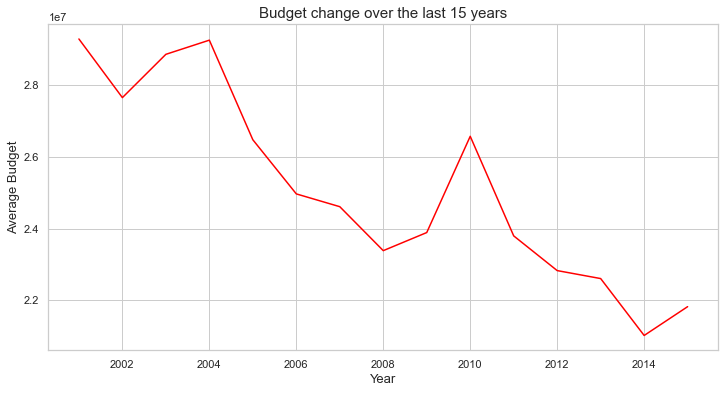

In [51]:
# Plotting chart showing the change of movies budget over the last 15 years.

df.groupby('release_year')['budget'].mean().tail(15).plot(figsize=(12,6),c='red')
plt.title("Budget change over the last 15 years",fontsize = 15)
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Average Budget',fontsize = 13);


>
> **Plot 3: Budget changes over the years**
>
> *How budget change over the last 15 years?*
>
>From the chart, we can see that there is a big decrease in the budget of the movie from **2004-2015**, And **2014** was the lowest budget in the last 15 years.

### Question 4: Which is the top popular movie over the years?

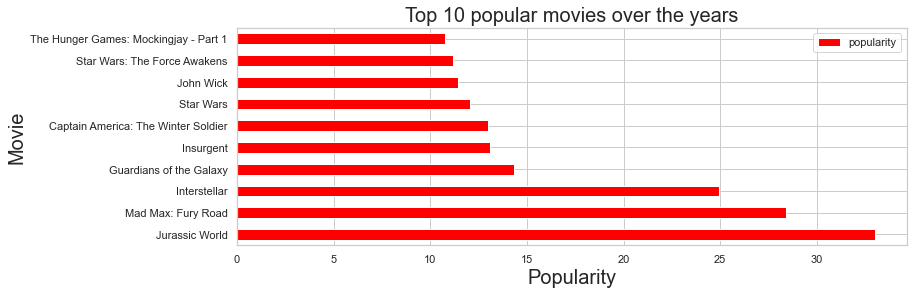

In [25]:
# plotting a plot showing Top 10 popular movies over the years.

df = df.sort_values("popularity", ascending =False)
df.head(10)[["title","popularity"]].set_index("title").plot(figsize=(12,4),
                                    kind = "barh", color='red')
plt.ylabel("Movie", fontsize=(20))
plt.xlabel("Popularity", fontsize=(20))
plt.title("Top 10 popular movies over the years", fontsize=(20));


>
> **Plot 4: Top 10 populer movies over the years**
>
>As we can see from the chart Jurassic World, Mad Max: Fury Road and interstellar ar the most popular movie over the years to 2015. 

<a id='conclusions'></a>
## Conclusions


>From the analysis, we can say that there is a slightly good relation between the budget and the popularity which mean movies with a good budget can maybe get good popularity.
>
> The movie's popularity starts increasing repeatedly from 2010 to 2015 and the lowest year was 2008. 
>
>The movies budget stat decreasing since 2002 and the lowest year with the budget was 2014
>
>The most popular movies over the years was Jurassic World

**Limitations**
>There were many missing values in budget and revenue columns and 0 values so I fell it with the mean 
>
>dropped some columns to make the analysis easier and better at the same time some of it not needed in my analysis 
